# **Chapter 8**
_replicate at least 2_

## **Genetic Algorithm**

In [6]:
import numpy as np

var_values = [1,-3,4.5,2]
num_coeff = 4
pop_chrom = 10 
sel_rate = 5

pop_size = (pop_chrom,num_coeff) 
pop_new = np.random.uniform(low=-10.0, high=10.0, size=pop_size)
print(pop_new)

num_gen = 100
for k in range(num_gen):
    fitness = np.sum(pop_new *var_values, axis=1)
    par_sel = np.empty((sel_rate, pop_new.shape[1]))
    print("Current generation = ", k)
    print("Best fitness value : ", np.max(fitness))
    
    for i in range(sel_rate):
        sel_id = np.where(fitness == np.max(fitness))
        sel_id = sel_id[0][0]
        par_sel[i, :] = pop_new[sel_id, :]
        fitness[sel_id]=np.min(fitness)

    offspring_size=(pop_chrom-sel_rate, num_coeff)
    offspring = np.empty(offspring_size)
    crossover_lenght = int(offspring_size[1]/2)
    
    for j in range(offspring_size[0]):
        par1_id = np.random.randint(0,par_sel.shape[0])
        par2_id = np.random.randint(0,par_sel.shape[0])
        offspring[j, 0:crossover_lenght] = par_sel[par1_id, 0:crossover_lenght]
        offspring[j, crossover_lenght:] = par_sel[par2_id, crossover_lenght:]
    
    for m in range(offspring.shape[0]):
        mut_val = np.random.uniform(-1.0, 1.0)
        mut_id = np.random.randint(0,par_sel.shape[1])
        offspring[m, mut_id] = offspring[m, mut_id] + mut_val 

    pop_new[0:par_sel.shape[0], :] = par_sel
    pop_new[par_sel.shape[0]:, :] = offspring

fitness = np.sum(pop_new *var_values, axis=1)
best_id = np.where(fitness == np.max(fitness))
print("Optimized coefficient values = ", pop_new[best_id, :])
print("Maximum value of y = ", fitness[best_id])

[[-1.506283    0.97858584  7.06857349 -4.08190855]
 [ 6.91832375 -6.82362722  1.52599377 -4.08613855]
 [-2.70798314 -4.34150591 -0.14547788  0.32515259]
 [ 2.71928451  1.29830134 -4.20873011 -5.38754178]
 [ 2.67848691  9.05920466  2.57541758  1.29011385]
 [-8.81594363  0.35951515  1.87607787 -7.20626053]
 [-6.58817076  5.78025388  3.36723947  9.81028809]
 [ 2.72171445  3.45862503  4.83909797 -0.7329152 ]
 [-0.86960725 -6.12460608  8.86070373 -2.37813224]
 [-4.86558367 -6.689861   -6.88012977  7.47397024]]
Current generation =  0
Best fitness value :  52.62111326168417
Current generation =  1
Best fitness value :  52.62111326168417
Current generation =  2
Best fitness value :  61.985966034781434
Current generation =  3
Best fitness value :  61.985966034781434
Current generation =  4
Best fitness value :  62.6486435913117
Current generation =  5
Best fitness value :  64.4848782767121
Current generation =  6
Best fitness value :  64.4848782767121
Current generation =  7
Best fitness value

## **Symbolic Regression**
_Note: must install library scikit-learn below version 1.7 to work._

_Due to scikit-learn internal method \_validate\_data no longer exist in 1.7_

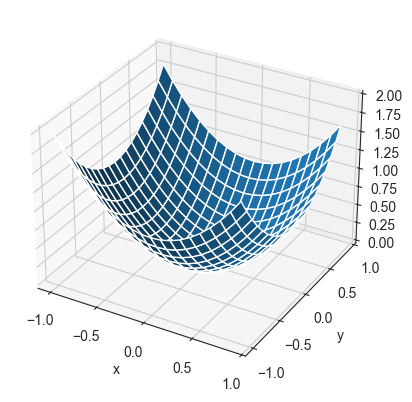

C:\Users\Zuzu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    36.62           1.2059        7         0.273911         0.277976      8.24s
   1     9.67         0.653883       11        0.0568042        0.0635825      5.44s
   2     6.99         0.480429        7                0                0      3.89s
add(mul(X1, X1), mul(X0, X0))
R2: 1.0


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from gplearn.genetic import SymbolicRegressor

x = np.arange(-1, 1, 1/10.)
y = np.arange(-1, 1, 1/10.)
x, y = np.meshgrid(x, y)
f_values = x**2 + y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # Modified line for 3D axis initialization
ax.plot_surface(x, y, f_values)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


input_train = np.random.uniform(-1, 1, (100, 2)).astype(np.float64)
output_train = (input_train[:, 0]**2 + input_train[:, 1]**2).astype(np.float64)

input_test = np.random.uniform(-1, 1, (100, 2)).astype(np.float64)
output_test = (input_test[:, 0]**2 + input_test[:, 1]**2).astype(np.float64)

function_set = ['add', 'sub', 'mul']

sr_model = SymbolicRegressor(
    population_size=1000,
    function_set=function_set,
    generations=10,
    stopping_criteria=0.001,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    parsimony_coefficient=0.01,
    random_state=1
)

sr_model.fit(input_train, output_train)


print(sr_model._program)
print('R2:',sr_model.score(input_test,output_test))

## **Cellular Automata**

Binary rule is: [0 1 1 1 1 1 1 0]


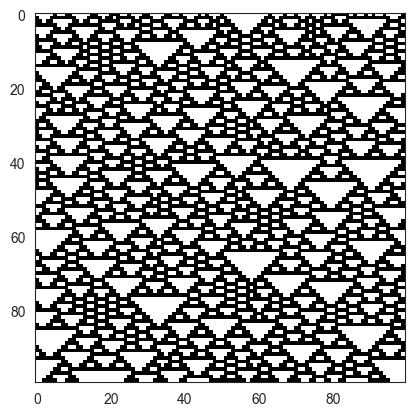

In [8]:
import numpy as np
import matplotlib.pyplot as plt

cols_num=100
rows_num=100
wolfram_rule=126
bin_rule = np.array([int(_) for _ in np.binary_repr(wolfram_rule, 8)])
print('Binary rule is:',bin_rule)

cell_state = np.zeros((rows_num, cols_num),dtype=np.int8)
cell_state[0, :] = np.random.randint(0,2,cols_num)

update_window= np.array([[4], [2], [1]])
for j in range(rows_num - 1):
    update = np.vstack((np.roll(cell_state[j, :], 1), cell_state[j, :],
                   np.roll(cell_state[j, :], -1))).astype(np.int8)
    rule_up = np.sum(update * update_window, axis=0).astype(np.int8)
    cell_state[j + 1, :] = bin_rule[7 - rule_up]
        

ca_img= plt.imshow(cell_state,cmap=plt.cm.binary)
plt.show()